# Proyecto Parcial - Machine Learnning 2023
# Brian Gabriel Barajas Guerrero
Este proyecto utiliza la base de datos de diabetes de los Pima Indians, un conjunto de datos bien establecido disponible en Kaggle que se ha empleado ampliamente para el modelado predictivo en la asistencia sanitaria. El conjunto de datos se origina a partir de un estudio realizado en la población india Pima, con el objetivo de explorar las relaciones entre diversos atributos relacionados con la salud y la probabilidad de padecer diabetes.

El conjunto de datos, que incluye una colección de indicadores clave de salud, incluye datos como el "nivel de glucosa", la "presión arterial", el "IMC" (índice de masa corporal) y los "niveles de insulina", entre otros. Estas características encapsulan métricas fisiológicas vitales que contribuyen a nuestra comprensión del perfil de salud de los individuos dentro de la comunidad india Pima.

El objetivo principal de este análisis es predecir la presencia o ausencia de diabetes, representada por la variable " Outcome " en el conjunto de datos. La variable " Outcome " sirve como indicador binario, con valores que denotan la aparición de diabetes (1) o la ausencia de diabetes (0).

Empleando la inferencia bayesiana con cadenas de Markov, el objetivo de este proyecto es estimar los parámetros de un modelo predictivo que capte la compleja interacción entre las características relacionadas con la salud y la probabilidad de padecer diabetes. Mediante este enfoque, pretendemos descubrir patrones matizados dentro del conjunto de datos, facilitando predicciones precisas y proporcionando información valiosa sobre los factores que influyen en el riesgo de diabetes entre la población india Pima.


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Step 2: Load the dataset
df = pd.read_csv('/home/brianbg/Downloads/diabetes.csv')


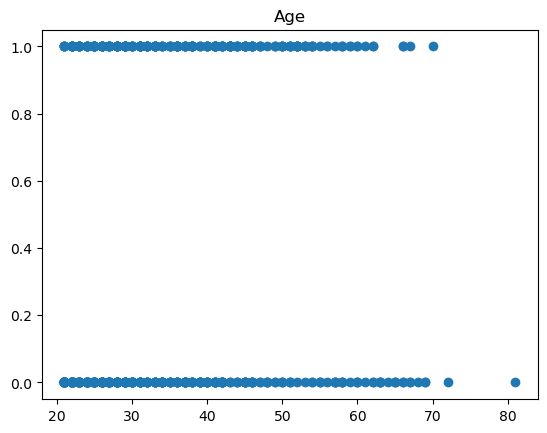

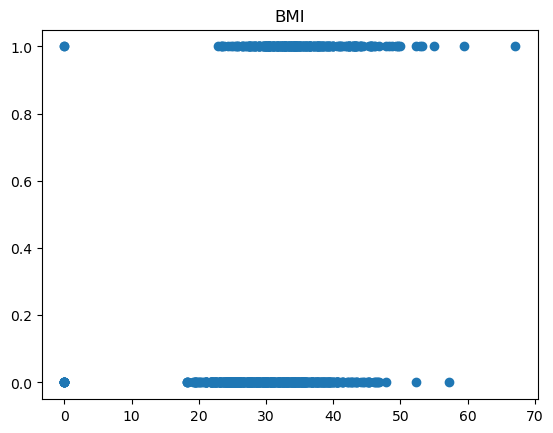

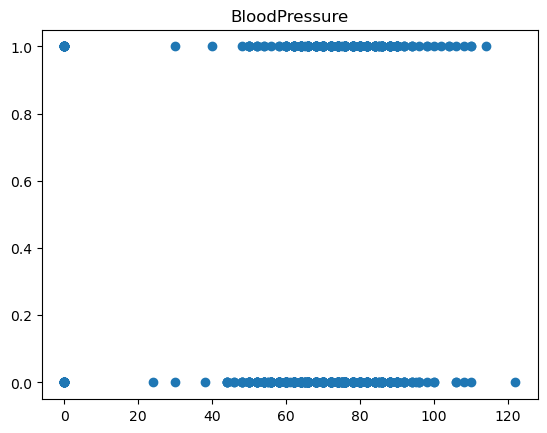

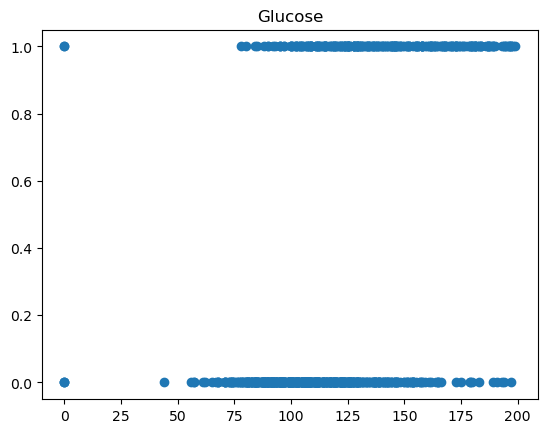

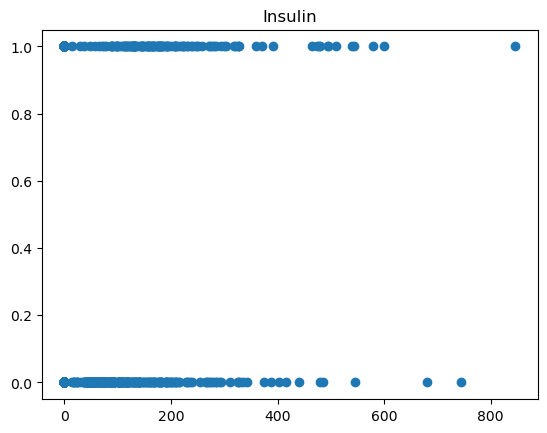

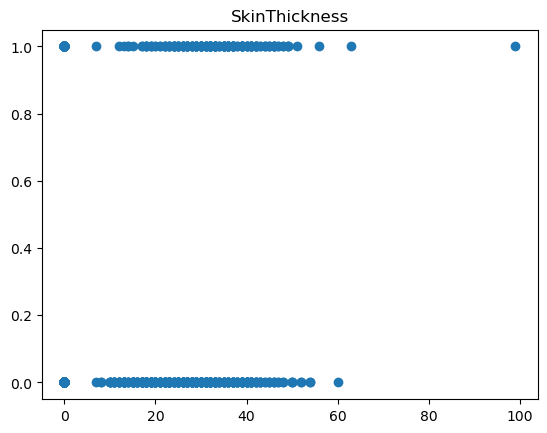

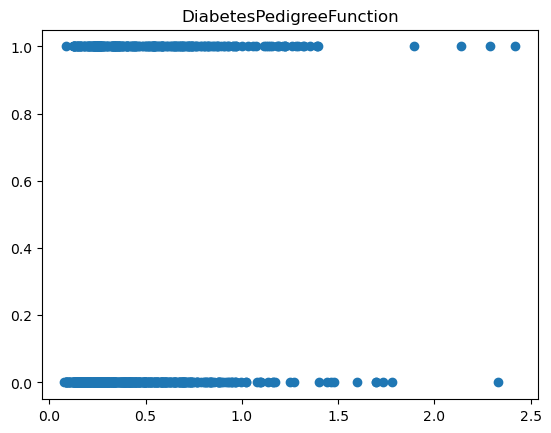

In [4]:
# Convert target to numpy array
target = np.array(df['Outcome'], dtype=float)

# Define predictor columns
columns = ['Age', 'BMI', 'BloodPressure', 'Glucose', 'Insulin', 'SkinThickness', 'DiabetesPedigreeFunction']

# Convert predictors to numpy arrays
data = []
for column in columns:
    data.append(np.array(df[column], dtype=float))

# Visualize each predictor against the target
for i, predictor in enumerate(data):
    plt.figure()
    plt.scatter(predictor, target)
    plt.title(columns[i])
    plt.show()

El " Outcome " es típicamente la variable que indica si un paciente tiene o no diabetes. A menudo se codifica como 0 (sin diabetes) o 1 (diabetes). Esta es la variable que nos interesa predecir o explicar, por lo que se denomina variable objetivo.

La razón por la que comparamos otras variables con el 'Outcome' es para comprender su relación con la presencia o ausencia de diabetes. Por ejemplo, podríamos querer saber si un IMC o una tensión arterial más altos están asociados a una mayor probabilidad de padecer diabetes. Al comparar estas variables con el " Outcome ", podemos empezar a comprender estas relaciones.

En un contexto de machine learning, el " Outcome " sería la variable que intentamos predecir utilizando las demás variables del conjunto de datos. Las otras variables (como "Edad", "IMC", "Presión arterial", etc.) se denominan características y se utilizan para entrenar el modelo de predicción del "Outcome".

gracias a estos gráficos, podemos notar que, aunque sea muy poca la diferencai parece que los factores más relevantes son la presión en la sangre, los niveles de glúcosa y el IBM

In [5]:
# Functions for MCMC
def log_likelihood(theta, x, y):
    m0, m1, m2, m3, m4, m5, m6, b = theta
    model = m0 * x[0] + m1 * x[1] + m2 * x[2] + m3 * x[3] + m4 * x[4] + m5 * x[5] + m6 * x[6] + b
    return -0.5 * np.sum((y - model) ** 2)

def log_prior(theta):
    m0, m1, m2, m3, m4, m5, m6, b = theta
    if -30.0 < m0 < 30 and -30 < m1 < 30 and -30 < m2 < 30 and -30 < m3 < 30 and -30 < m4 < 30 and -30 < m5 < 30 and -30 < m6 < 30 and -100 < b < 100:
        return 0.0
    return -np.inf

def log_probability(theta, x, y):
    lp = log_prior(theta)
    if not np.isfinite(lp):
        return -np.inf
    return lp + log_likelihood(theta, x, y)

- La función `log_likelihood` calcula la probabilidad logarítmica de los datos dados los parámetros. Asume una relación lineal entre los predictores y el objetivo, y utiliza la suma de los residuos al cuadrado como el likelihood.

- La función `log_prior` define las probabilidades a priori de los parámetros. Asume una distribución uniforme entre -30 y 30 para los parámetros de pendiente, y entre -100 y 100 para el intercepto. Si los parámetros caen fuera de estos rangos, asigna un log prior de infinito negativo, descartando efectivamente estos valores de los parámetros.

- La función `log_probability` calcula la probabilidad logarítmica total (log posterior) de los parámetros dados los datos. Es la suma de la log prior y la log likelihood.

In [9]:
import emcee

# Apply MCMC
pos = 1e-3 * np.random.randn(100, 8)
sampler = emcee.EnsembleSampler(
    100, 8, log_probability, args=(data, target)
)
# Run the MCMC for more steps
sampler.run_mcmc(pos, 10000, progress=True)  

100%|██████████| 10000/10000 [01:06<00:00, 150.08it/s]


State([[ 4.26118477e-03  2.21435586e-02 -2.13368276e-03  5.77548588e-03
  -1.76756919e-04 -1.85899325e-03  1.57966845e-01 -1.11713886e+00]
 [ 1.04169033e-02  1.32032114e-02 -4.69215244e-03  5.14186844e-03
   2.65213743e-04  2.49210143e-03  5.33782075e-02 -8.70051792e-01]
 [ 2.58332713e-03  1.58631707e-02 -2.52037928e-04  5.56908643e-03
   4.21200965e-04 -5.58701395e-03  8.21809809e-02 -7.95096444e-01]
 [ 1.14750734e-02  2.07496394e-02  6.42852188e-04  2.94220427e-03
   1.26810910e-04 -3.65493948e-03  3.63702765e-01 -1.15032733e+00]
 [ 6.72701504e-04  8.66443249e-03 -3.84902523e-03  6.63999204e-03
  -7.02065998e-04  4.38635297e-03  1.95545943e-01 -6.34213311e-01]
 [ 9.86972175e-03  3.54685072e-03 -4.69749741e-04  5.24857005e-03
  -4.28400398e-04 -5.42164862e-04  3.71893733e-01 -8.79898012e-01]
 [ 2.77587789e-03  7.44977252e-03 -4.13142952e-03  6.07213139e-03
  -4.49307774e-04  1.26457342e-03  1.58772397e-01 -5.10084580e-01]
 [ 3.38157553e-03  8.18055855e-03 -1.02961625e-03  6.95831424e-

- `pos = 1e-3 * np.random.randn(100, 8)`: Esta línea inicializa las posiciones de los walkers en el espacio de parámetros. Cada walker comienza en una pequeña posición aleatoria alrededor de cero.

- sampler = emcee.EnsembleSampler(100, 8, log_probability, args=(data, target))`: Esta línea crea un objeto `EnsembleSampler`, que realizará el muestreo MCMC. Toma el número de walkers, el número de parámetros, la función para calcular la probabilidad logarítmica, y cualquier argumento de esa función.

- `sampler.run_mcmc(pos, 5000, progress=True)`: Esta línea ejecuta el muestreador MCMC durante 5000 pasos partiendo de las posiciones iniciales. El argumento `progress=True` significa que mostrará una barra de progreso.

Esto ejecutará el muestreador MCMC y devolverá las posiciones finales de los walkers en el espacio de parámetros. 

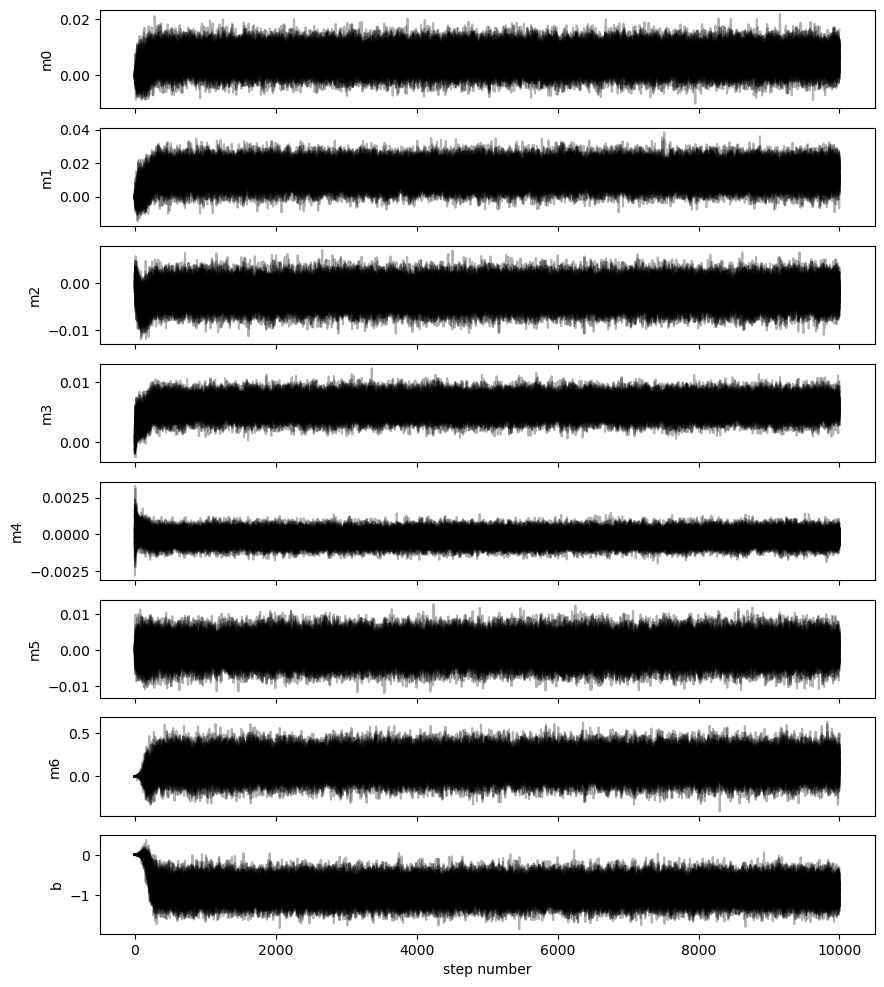

In [10]:
# Plot time series of weights
fig, axes = plt.subplots(8, figsize=(10, 12), sharex=True)
samples = sampler.get_chain()
labels = ["m0", "m1", "m2", "m3", "m4", "m5", "m6", "b"]
for i in range(8):
    ax = axes[i]
    ax.plot(samples[:, :, i], "k", alpha=0.3)
    ax.set_ylabel(labels[i])

axes[-1].set_xlabel("step number")
plt.show()

Esto creará un trazado para cada parámetro. Si las trazas son estacionarias y están bien mezcladas, es una buena señal de que el muestreo ha convergido.

In [11]:
# Compute autocorrelation time
tau = sampler.get_autocorr_time()
print(tau)

# Discard burn-in and thin samples
flat_samples = sampler.get_chain(discard=100, thin=15, flat=True)
print(flat_samples.shape)

[ 86.37937383  93.10098127  87.59412801  89.73356637  85.79180606
  85.85136792  90.19122673 125.72175877]
(66000, 8)


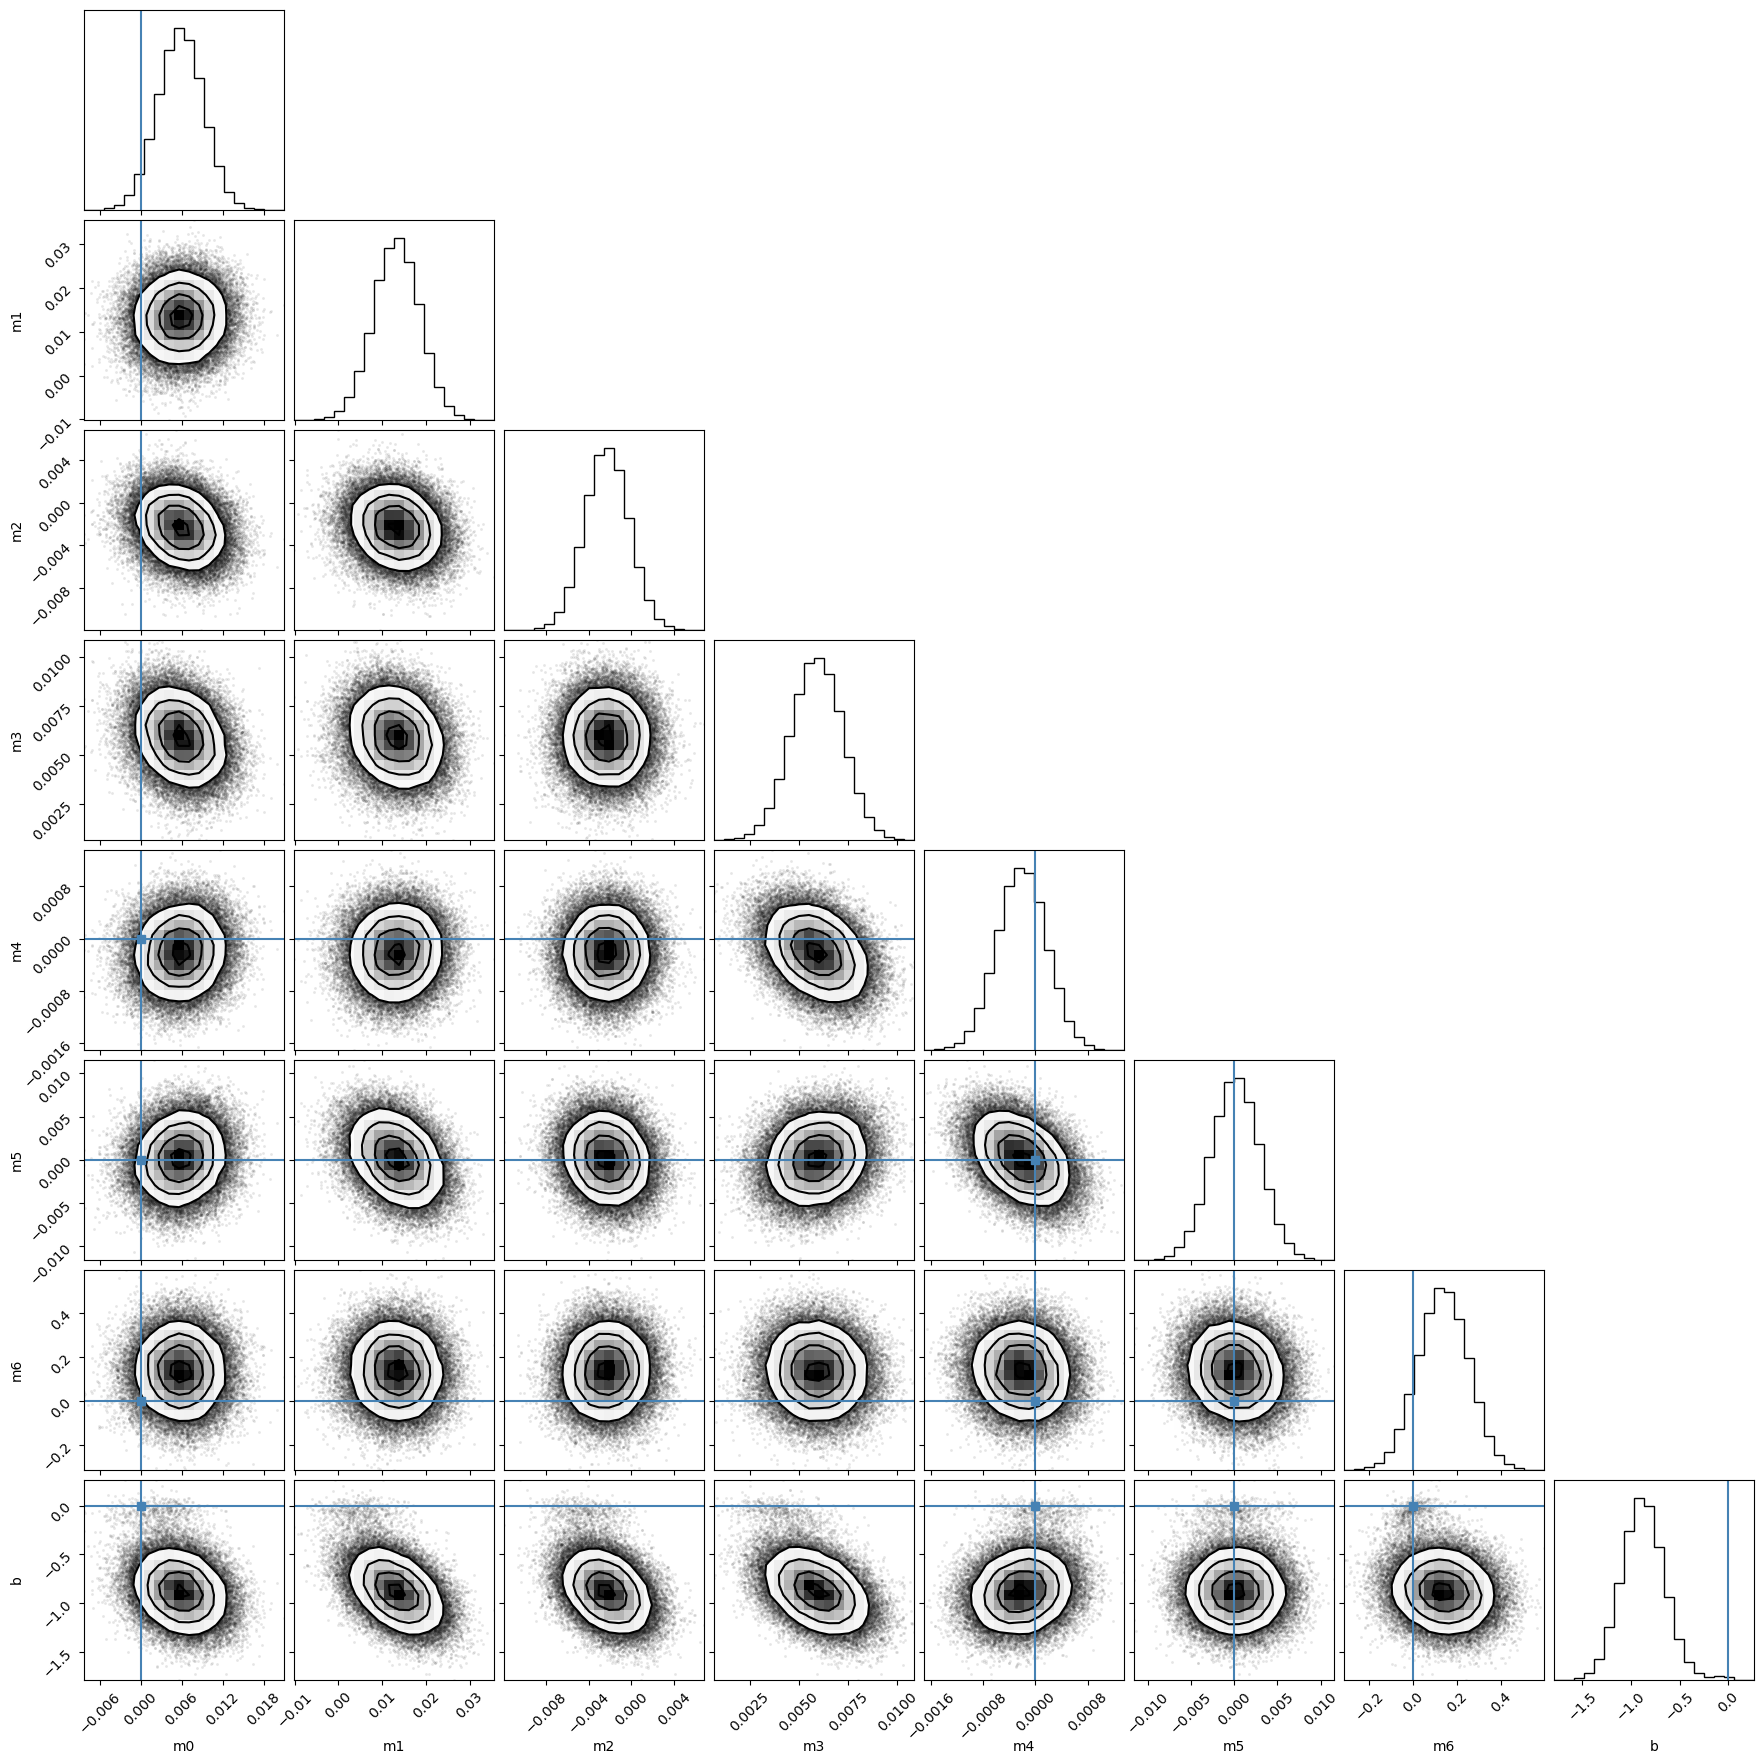

In [13]:
import corner
m0_t, m1_t, m2_t, m3_t, m4_t, m5_t, m6_t, b_t = 0, 2, 1.5, 1, 0, 0, 0, 0
fig = corner.corner(
    flat_samples, labels=labels, truths=[m0_t, m1_t, m2_t, m3_t, m4_t, m5_t, m6_t, b_t]
)


Esto creará un gráfico de esquina de sus muestras MCMC. Cada panel del gráfico muestra la distribución posterior de un parámetro o de un par de parámetros. Las líneas indican los valores reales de los parámetros. 